Aufgabe 1

Teilaufgabe a.)

In [44]:
import numpy as np
import matplotlib.pyplot as plt

#Nullstelle im Bereich [-1, 0]

def f_next(x):
    return (1/221) * (230*x**4 + 18 * x**3 + 9 * x**2 - 9)

x = 0.5
x_1 = f_next(x)
y = 0

while np.absolute(x - x_1) > 10 ** -9:
    x = x_1
    y += 1
    print("Iteration " + str(y) + " " + str(x_1))
    x_1 = f_next(x)

y += 1

print("Iteration " + str(y) + " Angebliche Nullstelle " + str(x_1))

Iteration 1 0.04468325791855204
Iteration 2 -0.040631257610676486
Iteration 3 -0.040659377631046476
Iteration 4 -0.04065928803106696
Iteration 5 Angebliche Nullstelle -0.04065928831666631


Die Nullstelle im Intervall 0, 1 ist abstossend. Sie liegt bei ungefähr 0.96239. Es lässt sich beobachten, dass falls ein Wert x <= 0.96 eingegeben wird, die Funktion gegen die Nullstelle im Bereich [-1, 0] konvergiert. Wird ein Wert x > 0.96 eingegeben, dann divergiert die Funktion. 

In [4]:
#Nullstelle im Bereich [0, 1]

x2 = 0.97
x2_1 = f_next(x2)

y2 = 0

while np.absolute(x2 - x2_1) > 10 ** -6:
    
    x2 = x2_1
    y2 += 1
    print("Iteration " + str(y2) + " " + str(x2_1))
    try:
        x2_1 = f_next(x2)
    except:
        print("OverflowError")

Iteration 1 0.9932740285067873
Iteration 2 1.0922752523692107
Iteration 3 1.5953730970741773
Iteration 4 7.135588222441846
Iteration 5 2729.7036083572507
Iteration 6 57784317890159.43
Iteration 7 1.160313984507048e+55
Iteration 8 1.8864168565107124e+220
OverflowError


Teilaufgabe b.)

0.5


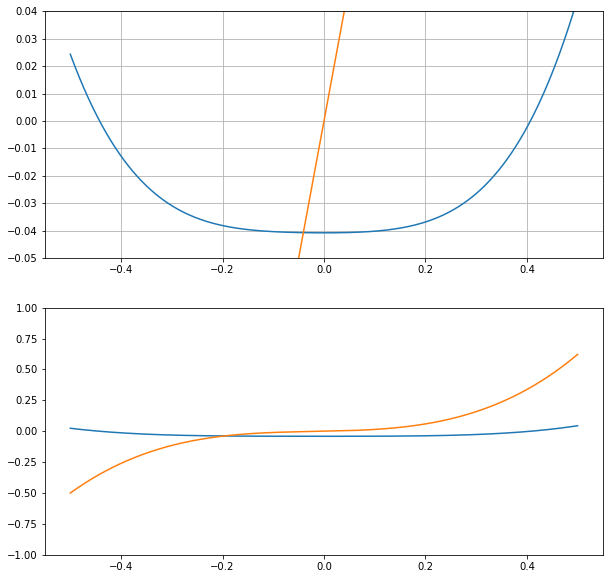

In [41]:
x_intervall = np.arange(-0.5, 0.5, 10 ** -4)
y_values = []
dy_values = []

def f_next_derivative(x):
    return (2/221 * x) * (460*x**2 + 27 * x + 9)

for x in x_intervall:
    y_values.append(f_next(x))

alpha = 1

for x in x_intervall:
    dy_values.append(f_next_derivative(x))
    if(f_next_derivative(x) < alpha):
        alpha = f_next_derivative(x)
    
print(np.absolute(alpha))

fig, axs = plt.subplots(2)

fig.set_size_inches(10, 10)

axs[0].set_ylim(-0.05, 0.04)
axs[0].grid()
axs[0].plot(x_intervall, y_values)
axs[0].plot(x_intervall, x_intervall)

axs[1].set_ylim(-1, 1)
axs[1].plot(x_intervall, y_values)
axs[1].plot(x_intervall, dy_values)


1.) Wir haben mit der Funktion F(x) eine Selbstabbildung gegeben. 

2.) Es lässt sich beobachten, dass bei den beiden Punkten x = -0.5 und x = 0.5 die Steigung (betragsmässig) mit einem Wert von 0.5 maximal ist. Unser gesuchtes Alpha ist also 0.5, dies liegt unter der Steigung 1 von x=y und somit ist der zweite Punkt des Banaschen Fixpunktsatzes erfüllt. 

Teilaufgabe c.)
Mit dem Wert x0 = 0 und x1 = 0.0407 braucht es gemäss Wolfram Alpha ca. 26 Schritte, dies ist aber um einiges mehr als es tatsächlich braucht. 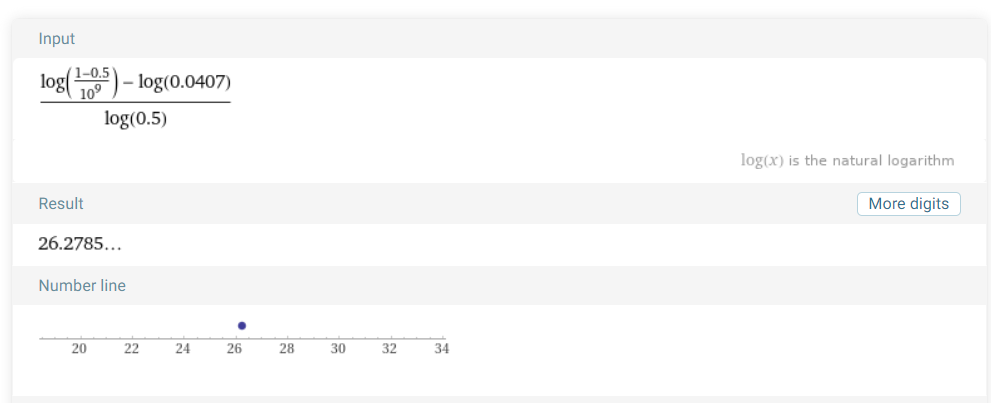


Aufgabe 2

Teilaufgabe a.)

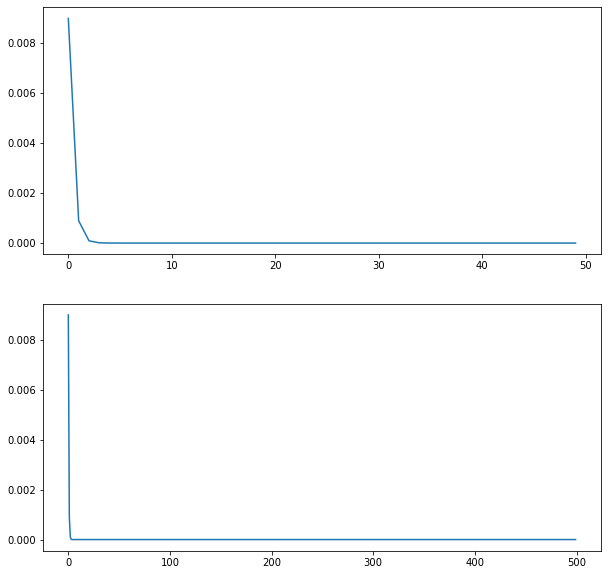

In [176]:
infektionsrate = 0.1
KK_in_Prozent = 0.1
zeitspanne = np.arange(0, 1000, 1)

def modell_funktion(infektionsrate, KK_in_Prozent):
    return infektionsrate * KK_in_Prozent * (1 - KK_in_Prozent)

def plotting(infektionsrate, dauer):
    Kranke_in_Prozent = []
    KK_in_Prozent = 0.1
    for x in range(dauer):
        Kranke_in_Prozent.append(modell_funktion(infektionsrate, KK_in_Prozent))
        KK_in_Prozent = modell_funktion(infektionsrate, KK_in_Prozent)
    return Kranke_in_Prozent

def set_Up(dauer):
    return np.arange(0, dauer, 1)

fig, axs = plt.subplots(2)
fig.set_size_inches(10, 10)

axs[0].plot(set_Up(50), plotting(0.1, 50))           #Verhältnis nach 50 Zeiteinheiten
axs[1].plot(set_Up(500), plotting(0.1, 500))         #Verhältnis nach 500 Zeiteinheiten

In [174]:
infektionsraten_test = np.arange(0, 4, 0.1)
alpha_values = []
grenzwerte = []

KK_in_Prozent = 0.1

def modell_funktion_mit_Parameter(alpha):
    return alpha * KK_in_Prozent * (1 - KK_in_Prozent) 

for x in infektionsraten_test:
    KK_in_Prozent = 0.1
    for y in zeitspanne:
        if np.absolute(KK_in_Prozent - modell_funktion_mit_Parameter(x)) > 10 ** -5:
            KK_in_Prozent = modell_funktion_mit_Parameter(x)
        else:
            alpha_values.append({x, y})
            grenzwerte.append({x, KK_in_Prozent})
            break
          
print(alpha_values)


[{0.0, 1}, {0.1, 4}, {0.2, 6}, {0.30000000000000004, 8}, {0.4, 10}, {0.5, 13}, {0.6000000000000001, 16}, {0.7000000000000001, 22}, {0.8, 33}, {0.9, 59}, {1.0, 303}, {1.1, 42}, {1.2000000000000002, 36}, {1.3, 27}, {1.4000000000000001, 21}, {1.5, 17}, {1.6, 14}, {1.7000000000000002, 12}, {1.8, 10}, {8, 1.9000000000000001}, {2.0, 6}, {2.1, 7}, {8, 2.2}, {2.3000000000000003, 10}, {2.4000000000000004, 10}, {2.5, 15}, {2.6, 20}, {2.7, 29}, {2.8000000000000003, 45}, {2.9000000000000004, 91}]


Für die oben ersichtlichen alpha-Werte existierende anziehende Fixpunkte, nach einer gewissen Anzahl von Iterationen konvergiert die Reihe also. Index 1 der Tupel sind die alpha-Werte und Index 2, die Anzahl von Zeitschritten, bis die zwischen xk und xk+1 kleiner als 10 ** -5 ist. Für alle Werte unter 3 konvergiert die Reihe also und für alle Werte darüber nicht.

Teilaufgabe b.)
Ein Fixpunkt bedeutet bei diesem Beispiel eine "Normalisierung" der Infektionen bzw. es stellt sich ein konstantbleibendes Verhältnis von Kranken gegenüber Gesunden ein. Bei einer Infektionsrate von 2 sind bspw. nach 6 Zeiteinheiten 50 % der Kinder krank und 50 % der Kinder gesund. Logischerweise sind bei diesem Modell im nächsten Zeitschritt die vorerhig gesunden Kinder krank und die vorherig kranken wieder gesund. Dieses Verhältnis wird also bestehen bleiben. Bei anderen Werten wie bspw. 3 haben wir eine (relativ) regelmässige Oszillation zwischen zwei Werten, jedoch keine Konvergenz. Bei wieder anderen Werten wie bspw. 4 ist nicht wirklich eine Regelmässigkeit zu erkennen. Die Verhältnisse "springen" wild umher.

[{0.0}, {0.1, 8.910251076644438e-06}, {0.2, 5.631401102058383e-06}, {0.30000000000000004, 5.681159770111365e-06}, {0.4, 8.889844493269201e-06}, {0.5, 1.0053824045080685e-05}, {0.6000000000000001, 2.2279963050171177e-05}, {0.7000000000000001, 2.8897417966040655e-05}, {0.8, 4.152821031141632e-05}, {0.9, 9.777015069176937e-05}, {0.0031594885211506003, 1.0}, {0.09100710927931152, 1.1}, {0.16662585361425925, 1.2000000000000002}, {0.23074152060386088, 1.3}, {0.2856926198308569, 1.4000000000000001}, {0.33331716636639475, 1.5}, {0.3749873806355677, 1.6}, {0.41175824911079645, 1.7000000000000002}, {0.44443978955467495, 1.8}, {0.47367930599118196, 1.9000000000000001}, {0.49999968614491325, 2.0}, {0.5238118556882378, 2.1}, {0.545462114165294, 2.2}, {0.5652219211354287, 2.3000000000000003}, {0.5833403211313509, 2.4000000000000004}, {0.600003756718455, 2.5}, {0.6153789417385903, 2.6}, {0.6296340712854668, 2.7}, {0.6428618160089961, 2.8000000000000003}, {0.6551775157238682, 2.9000000000000004}]


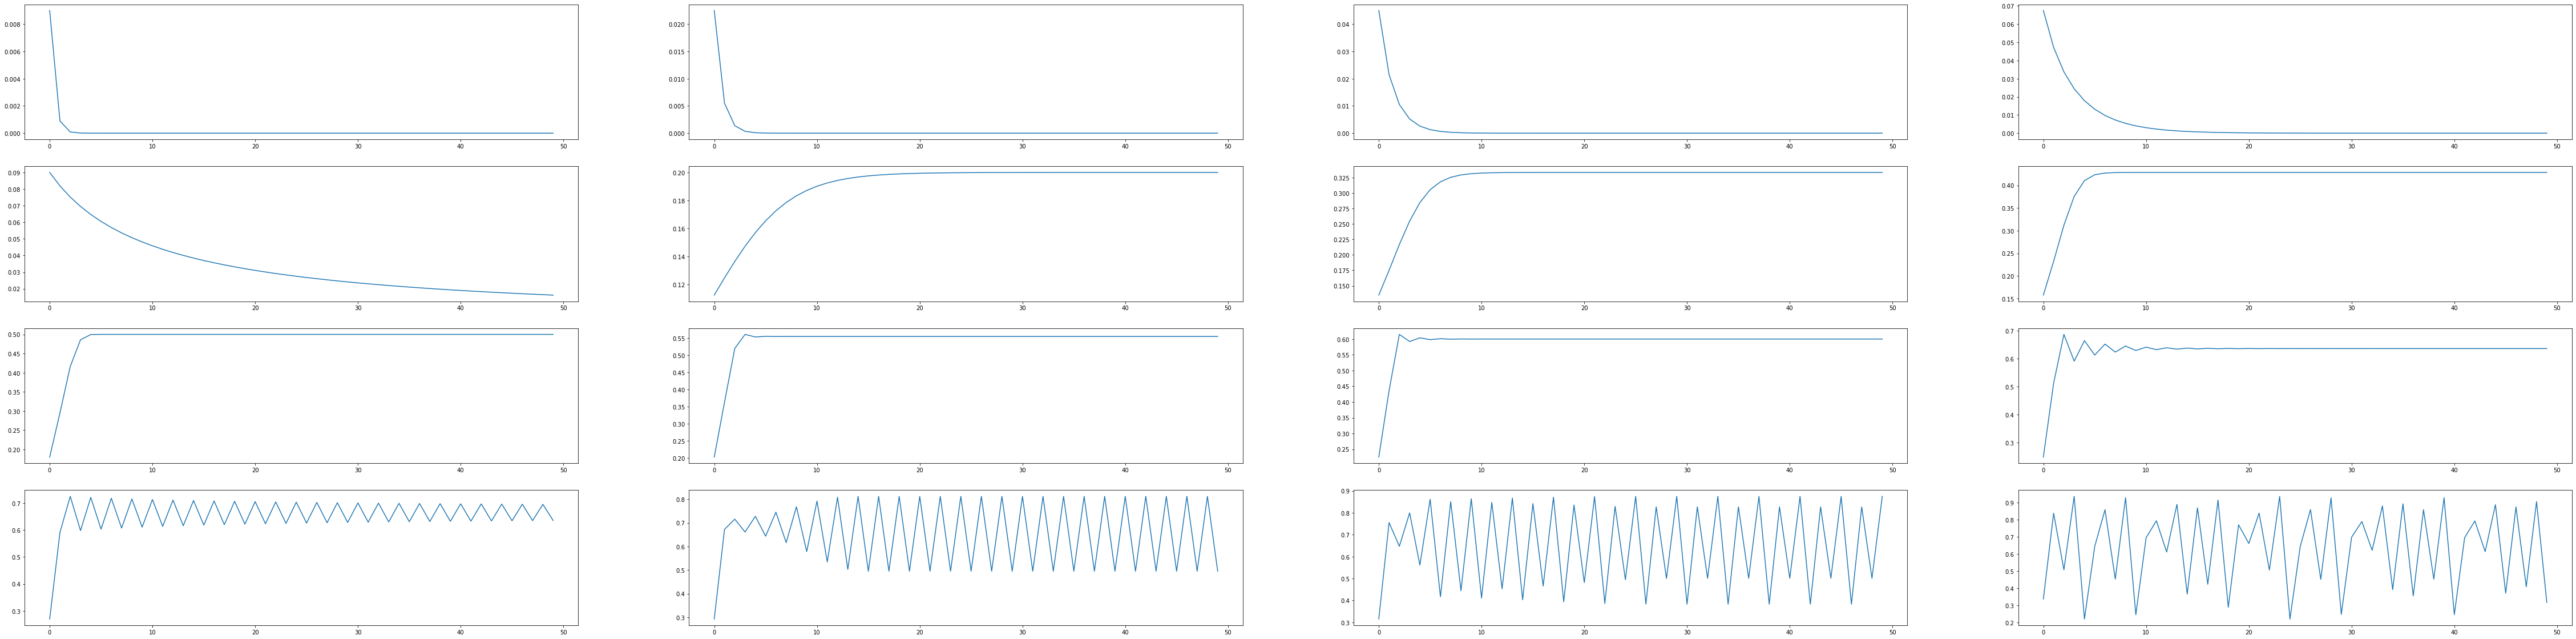

In [185]:
print(grenzwerte)

fig, axs = plt.subplots(4, 4)
fig.set_size_inches(80, 20)

axs[0, 0].plot(set_Up(50), plotting(0.1, 50))
axs[0, 1].plot(set_Up(50), plotting(0.25, 50))
axs[0, 2].plot(set_Up(50), plotting(0.5, 50))
axs[0, 3].plot(set_Up(50), plotting(0.75, 50))

axs[1, 0].plot(set_Up(50), plotting(1, 50))
axs[1, 1].plot(set_Up(50), plotting(1.25, 50))
axs[1, 2].plot(set_Up(50), plotting(1.5, 50))
axs[1, 3].plot(set_Up(50), plotting(1.75, 50))

axs[2, 0].plot(set_Up(50), plotting(2, 50))
axs[2, 1].plot(set_Up(50), plotting(2.25, 50))
axs[2, 2].plot(set_Up(50), plotting(2.5, 50))
axs[2, 3].plot(set_Up(50), plotting(2.75, 50))

axs[3, 0].plot(set_Up(50), plotting(3, 50))
axs[3, 1].plot(set_Up(50), plotting(3.25, 50))
axs[3, 2].plot(set_Up(50), plotting(3.5, 50))
axs[3, 3].plot(set_Up(50), plotting(3.75, 50))